# Sieci neuronowe dla klasyfikacji

Do przygotowania poniższych programów wykorzystano następujące dataset'y:

- [banknote authentication dataset](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) - zawiera dwa różne modele w różnych rozmiarach
- [cifar10 dataset](https://www.tensorflow.org/datasets/catalog/cifar10) - klasyfikacja trzech zwierząt (kota, żaby oraz konia)
- [fashion mnist (Zalando)](https://www.tensorflow.org/datasets/catalog/fashion_mnist) - zawiera confusion matrix

Implementacja:

- Sylwester Kąkol
- Adam Jurkiewicz

## Banknotes Authentication

In [59]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


Classifying banknotes as real or fake.

Read the data and split into train&test parts.


In [60]:
print("<----->\nBanknote\n<----->")
banknote_data = pd.read_csv('banknotes.csv', names=['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Class'])
b_train_dataset = banknote_data.sample(frac=0.8, random_state=200)
b_test_dataset = banknote_data.drop(b_train_dataset.index)

b_train_data = b_train_dataset.copy()
b_train_label = b_train_data.pop('Class')
b_train_label = np.array(b_train_label)


<----->
Banknote
<----->


Setup the layers and compile the model.

In [61]:
b_test_data = b_test_dataset.copy()
b_test_label = b_test_data.pop('Class')
b_test_label = np.array(b_test_label)

In [62]:
banknote_model = tf.keras.Sequential([tf.keras.layers.Dense(64, activation='relu'),
                                      tf.keras.layers.Dense(1)
                                      ])
banknote_model.compile(optimizer='adam',
                       loss='mean_squared_error',
                       metrics=['accuracy']
                       )
banknote_model.fit(b_train_data, b_train_label, epochs=5)

Epoch 1/5
 7/35 [=====>........................] - ETA: 0s - loss: 8.2897 - accuracy: 0.1964

2022-12-14 21:51:19.609284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - 1s 8ms/step - loss: 5.8155 - accuracy: 0.2013
Epoch 2/5
35/35 [==============================] - 0s 6ms/step - loss: 2.7746 - accuracy: 0.2304
Epoch 3/5
35/35 [==============================] - 0s 5ms/step - loss: 1.5158 - accuracy: 0.2741
Epoch 4/5
35/35 [==============================] - 0s 8ms/step - loss: 0.9150 - accuracy: 0.3233
Epoch 5/5
35/35 [==============================] - 0s 6ms/step - loss: 0.5993 - accuracy: 0.4463


Use a different model to classify the same dataset.

In [63]:
banknote_model_v2 = tf.keras.Sequential([tf.keras.layers.Dense(5, activation='relu'),
                                          tf.keras.layers.Dense(1)
                                          ])
banknote_model_v2.compile(optimizer='adam',
                       loss='mean_squared_error',
                       metrics=['accuracy']
                       )
banknote_model_v2.fit(b_train_data, b_train_label, epochs=5)

Epoch 1/5


2022-12-14 21:51:21.068829: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - 1s 7ms/step - loss: 8.7043 - accuracy: 0.2732
Epoch 2/5
35/35 [==============================] - 0s 5ms/step - loss: 6.6550 - accuracy: 0.2505
Epoch 3/5
35/35 [==============================] - 0s 5ms/step - loss: 5.2440 - accuracy: 0.2432
Epoch 4/5
35/35 [==============================] - 0s 6ms/step - loss: 4.2410 - accuracy: 0.2413
Epoch 5/5
35/35 [==============================] - 0s 5ms/step - loss: 3.4360 - accuracy: 0.2650


## CIFAR10


Classifying 3 different animals.


In [64]:
print("<----->\nCifar10 Selected Animals\n<----->")
cifar10_data = tf.keras.datasets.cifar10
(c_train_data, c_train_label), (c_test_data, c_test_label) = cifar10_data.load_data()

<----->
Cifar10 Selected Animals
<----->


Divide by 255 to receive values in range 0-1

In [65]:
c_train_data = c_train_data / 255.0
c_test_data = c_test_data / 255.0

Pick sections of interest from the Cifar10 dataset and then transform into a single dataset.
Update labels to match standard array.

In [66]:
train_cat_index = np.where(c_train_label.reshape(-1) == 3)
train_cat_data = c_train_data[train_cat_index]
train_cat_label = c_train_label[train_cat_index]

In [67]:
train_frog_index = np.where(c_train_label.reshape(-1) == 6)
train_frog_data = c_train_data[train_frog_index]
train_frog_label = c_train_label[train_frog_index]

In [68]:
train_horse_index = np.where(c_train_label.reshape(-1) == 7)
train_horse_data = c_train_data[train_horse_index]
train_horse_label = c_train_label[train_horse_index]

In [69]:
cifar3_train_data = np.concatenate((train_cat_data, train_frog_data, train_horse_data))
cifar3_train_label = np.concatenate((train_cat_label, train_frog_label, train_horse_label)).reshape(-1, 1)
cifar3_train_label[cifar3_train_label == 3] = 0
cifar3_train_label[cifar3_train_label == 6] = 1
cifar3_train_label[cifar3_train_label == 7] = 2

In [70]:
test_cat_index = np.where(c_test_label.reshape(-1) == 3)
test_cat_data = c_test_data[test_cat_index]
test_cat_label = c_test_label[test_cat_index]

test_frog_index = np.where(c_test_label.reshape(-1) == 6)
test_frog_data = c_test_data[test_frog_index]
test_frog_label = c_test_label[test_frog_index]

test_horse_index = np.where(c_test_label.reshape(-1) == 7)
test_horse_data = c_test_data[test_horse_index]
test_horse_label = c_test_label[test_horse_index]

cifar3_test_data = np.concatenate((test_cat_data, test_frog_data, test_horse_data))
cifar3_test_label = np.concatenate((test_cat_label, test_frog_label, test_horse_label)).reshape(-1, 1)
cifar3_test_label[cifar3_test_label == 3] = 0
cifar3_test_label[cifar3_test_label == 6] = 1
cifar3_test_label[cifar3_test_label == 7] = 2

Build convolution neural network.

In [71]:
cifar3_model = tf.keras.models.Sequential(
    [tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
     tf.keras.layers.MaxPooling2D((2, 2)),
     tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
     tf.keras.layers.MaxPooling2D((2, 2)),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(64, activation='relu'),
     tf.keras.layers.Dense(3, activation='softmax')
     ])
cifar3_model.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy']
                     )
cifar3_model.fit(cifar3_train_data, cifar3_train_label, epochs=10)

Epoch 1/10
  1/469 [..............................] - ETA: 2:15 - loss: 1.0995 - accuracy: 0.3750

2022-12-14 21:51:23.634122: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 5s 10ms/step - loss: 0.7299 - accuracy: 0.6752
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.5193 - accuracy: 0.7858
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.4427 - accuracy: 0.8231
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.4119 - accuracy: 0.8346
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.3665 - accuracy: 0.8539
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.3465 - accuracy: 0.8627
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 0.3173 - accuracy: 0.8763
Epoch 8/10
469/469 [==============================] - 5s 11ms/step - loss: 0.2856 - accuracy: 0.8877
Epoch 9/10
469/469 [==============================] - 5s 10ms/step - loss: 0.2647 - accuracy: 0.8951
Epoch 10/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2435 - accuracy: 0.9051


## Fashion MNIST


Classifying 10 different types of clothes.


In [72]:
print("<----->\nFashion Mnist\n<----->")
fashion_data = tf.keras.datasets.fashion_mnist
(f_train_data, f_train_label), (f_test_data, f_test_label) = fashion_data.load_data()
f_train_data = f_train_data / 255.0
f_test_data = f_test_data / 255.0

<----->
Fashion Mnist
<----->


Flatten transforms the format of the images from a 2D array into one dimensional array of 28x28.

In [73]:
fashion_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                     tf.keras.layers.Dense(128, activation='relu'),
                                     tf.keras.layers.Dense(10, activation='softmax')
                                     ])
fashion_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy']
                      )
fashion_model.fit(f_train_data, f_train_label, epochs=10)

Epoch 1/10
  16/1875 [..............................] - ETA: 13s - loss: 1.7181 - accuracy: 0.4121

2022-12-14 21:52:09.030684: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 9s 5ms/step - loss: 0.4983 - accuracy: 0.8245
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3717 - accuracy: 0.8658
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3373 - accuracy: 0.8764
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3127 - accuracy: 0.8861
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2973 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2799 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2695 - accuracy: 0.8994
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2585 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2482 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2406 - acc

### Confusion matrix

Make predictions and convert prediction probabilities into integers.
Create and plot confusion matrix.

 76/313 [======>.......................] - ETA: 0s

2022-12-14 21:53:42.864955: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


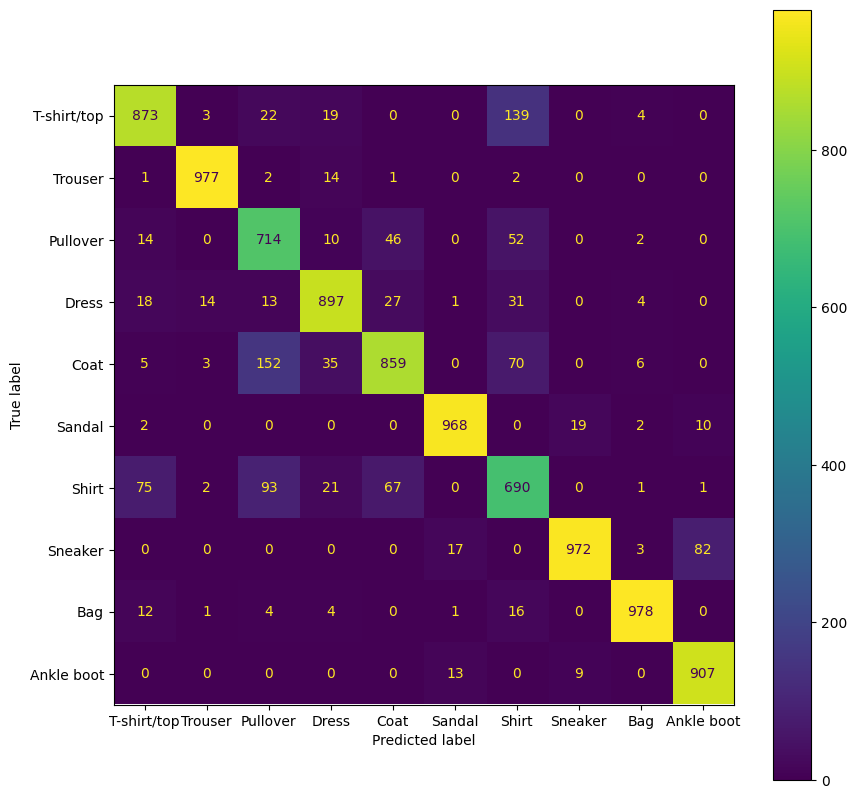

In [74]:
label_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
test_labels = np.array(f_test_label)

# Make predictions
y_probabilities = fashion_model.predict(f_test_data)

# Convert prediction probabilities into integers
y_predictions = y_probabilities.argmax(axis=1)

# Confusion matrix
cm=confusion_matrix(y_predictions,test_labels)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)


## Classifying age of abalones.


In [75]:
print("<----->\nAbalone\n<----->")
abalone_data = pd.read_csv('abalones.csv',
                           names=['Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight',
                                  'Shell Weight', 'Age'])
a_train_dataset = abalone_data.sample(frac=0.8, random_state=200)
a_test_dataset = abalone_data.drop(a_train_dataset.index)

a_train_data = a_train_dataset.copy()
a_train_label = a_train_data.pop('Age')
a_train_label = np.array(a_train_label)

a_test_data = a_test_dataset.copy()
a_test_label = a_test_data.pop('Age')
a_test_label = np.array(a_test_label)

normalize = tf.keras.layers.Normalization()
normalize.adapt(a_train_data)
normalize.adapt(a_test_data)

<----->
Abalone
<----->


2022-12-14 21:53:43.965937: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-14 21:53:43.984737: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [77]:
abalone_model = tf.keras.Sequential([normalize,
                                     tf.keras.layers.Dense(128, activation='relu'),
                                     tf.keras.layers.Dense(64, activation='relu'),
                                     tf.keras.layers.Dense(28, activation='softmax')
                                     ])
abalone_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy']
                      )
abalone_model.fit(a_train_data, a_train_label, epochs=10)
print(f"Models accuracy"
       f"\nBanknote: {round(banknote_model.evaluate(b_test_data, b_test_label)[1] * 100, 2)}%"
       f"\nBanknote 2: {round(banknote_model_v2.evaluate(b_test_data, b_test_label)[1] * 100, 2)}%"
       f"\nCifar3: {round(cifar3_model.evaluate(cifar3_test_data, cifar3_test_label)[1] * 100, 2)}%"
       f"\nFashion: {round(fashion_model.evaluate(f_test_data, f_test_label)[1] * 100, 2)}%"
       f"\nAbalone: {round(abalone_model.evaluate(a_test_data, a_test_label, batch_size=128)[1] * 100, 2)}%")

Epoch 1/10
 1/35 [..............................] - ETA: 9s - loss: 3.3322 - accuracy: 0.0000e+00

2022-12-14 21:55:24.531997: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - 1s 9ms/step - loss: 3.3001 - accuracy: 0.0000e+00
Epoch 2/10
35/35 [==============================] - 0s 7ms/step - loss: 3.2328 - accuracy: 0.0000e+00
Epoch 3/10
35/35 [==============================] - 0s 7ms/step - loss: 3.1658 - accuracy: 0.0000e+00
Epoch 4/10
35/35 [==============================] - 0s 7ms/step - loss: 3.0991 - accuracy: 0.0000e+00
Epoch 5/10
35/35 [==============================] - 0s 7ms/step - loss: 3.0327 - accuracy: 0.0000e+00
Epoch 6/10
35/35 [==============================] - 0s 7ms/step - loss: 2.9666 - accuracy: 0.0000e+00
Epoch 7/10
35/35 [==============================] - 0s 7ms/step - loss: 2.9009 - accuracy: 0.0000e+00
Epoch 8/10
35/35 [==============================] - 0s 8ms/step - loss: 2.8356 - accuracy: 0.0000e+00
Epoch 9/10
35/35 [==============================] - 0s 8ms/step - loss: 2.7706 - accuracy: 0.0000e+00
Epoch 10/10
3/3 [==============================] - 0s 23ms/step - loss: 2.6725 - accuracy: 0.

2022-12-14 21:55:30.031778: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
